# 크롤링

## 사전 지식

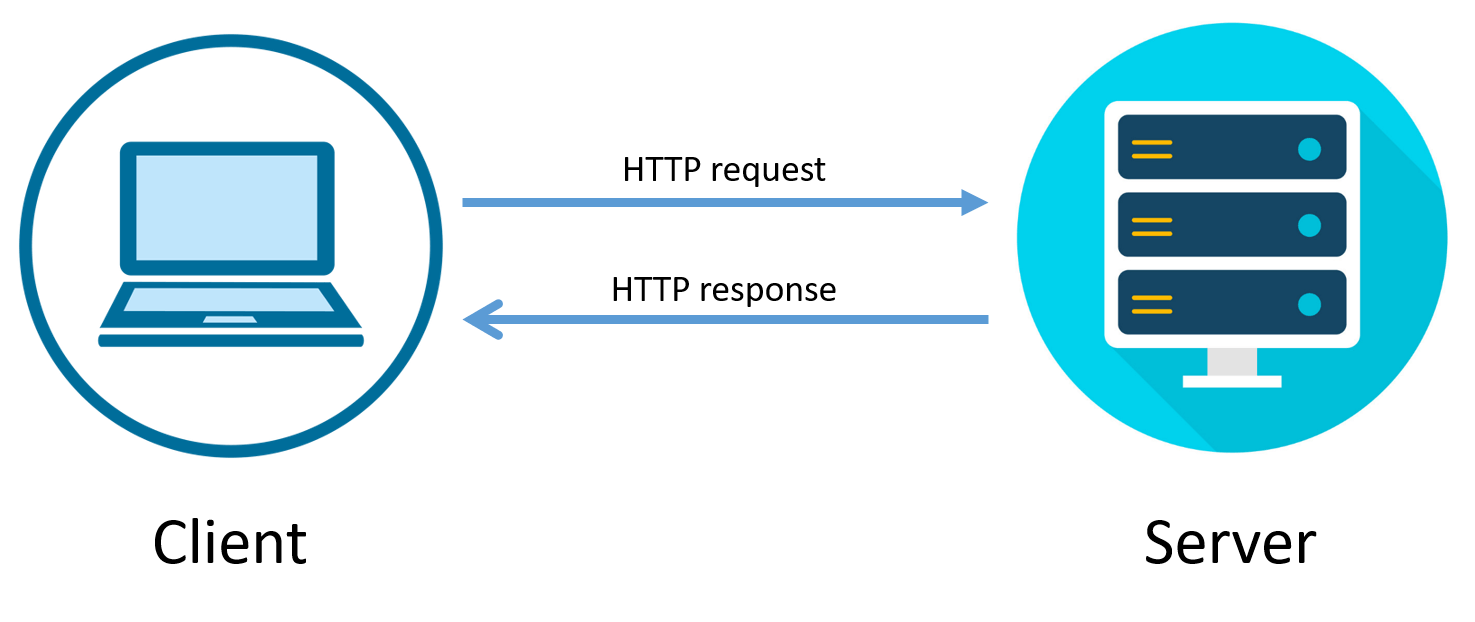

### Request의 종류
- GET : URL에 주소와 데이터를 표기 <strong>(속도 빠르고 보안 낮음)</strong>
- POST : URL에 주소를 표기하고 데이터는 HTML BODY에 표기 <strong>(속도 느리고 보안 높음)</strong>

### 용어 설명
- Crawling(크롤링) : 웹 페이지를 그대로 가져와서 거기서 데이터를 추출해 내는 행위(한국) => <strong>월드 와이드 웹을 탐색하는 컴퓨터 프로그램</strong>
- Scraping(스크랩핑) : 웹 사이트 에서 데이터 를 추출
#### 출처 위키백과

## 라이브러리
- 크롤링 : requests, selenium
- 스크래핑 : BeautifulSoup
- 데이터가공 : pandas

### 라이브러리별 함수 설명
#### requests
- get : request에서 get방식으로 서버에 요청 
 - get(url, headers, params)
- post : request에서 post방식으로 서버에 요청 
 - post(url, headers, params)

#### BeautifulSoup
- BeautifulSoup : 스크래핑할 객체 생성 
 - BeautifulSoup(html, parser)
- select : 스크래핑 함수 
 - select('파싱 문장')

#### pandas
- DataFrame : 데이터 가공을 위한 형태로 변환 
 - DataFrame(inputData, columns)
- to_csv, to_excel : 해당 포맷으로 데이터 저장
 - to_csv(path, index=False)

## 코드

### 라이브러리 import
- pandas, bs4(BeautifulSoup) 설치 필요
 - !pip install -y pandas
 - !pip install -y bs4

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### 크롤링

In [2]:
url = 'https://search.daum.net/search'
params = {'q' : '노원구 날씨'}
res = requests.get(url, params = params)

### 스크래핑

In [3]:
soup = BeautifulSoup(res.text, 'html.parser')

- 크롬 브라우져 F12를 눌러서 개발자모드 오픈
- 화살표를 눌러서 스크래핑 하고자 하는곳을 클릭
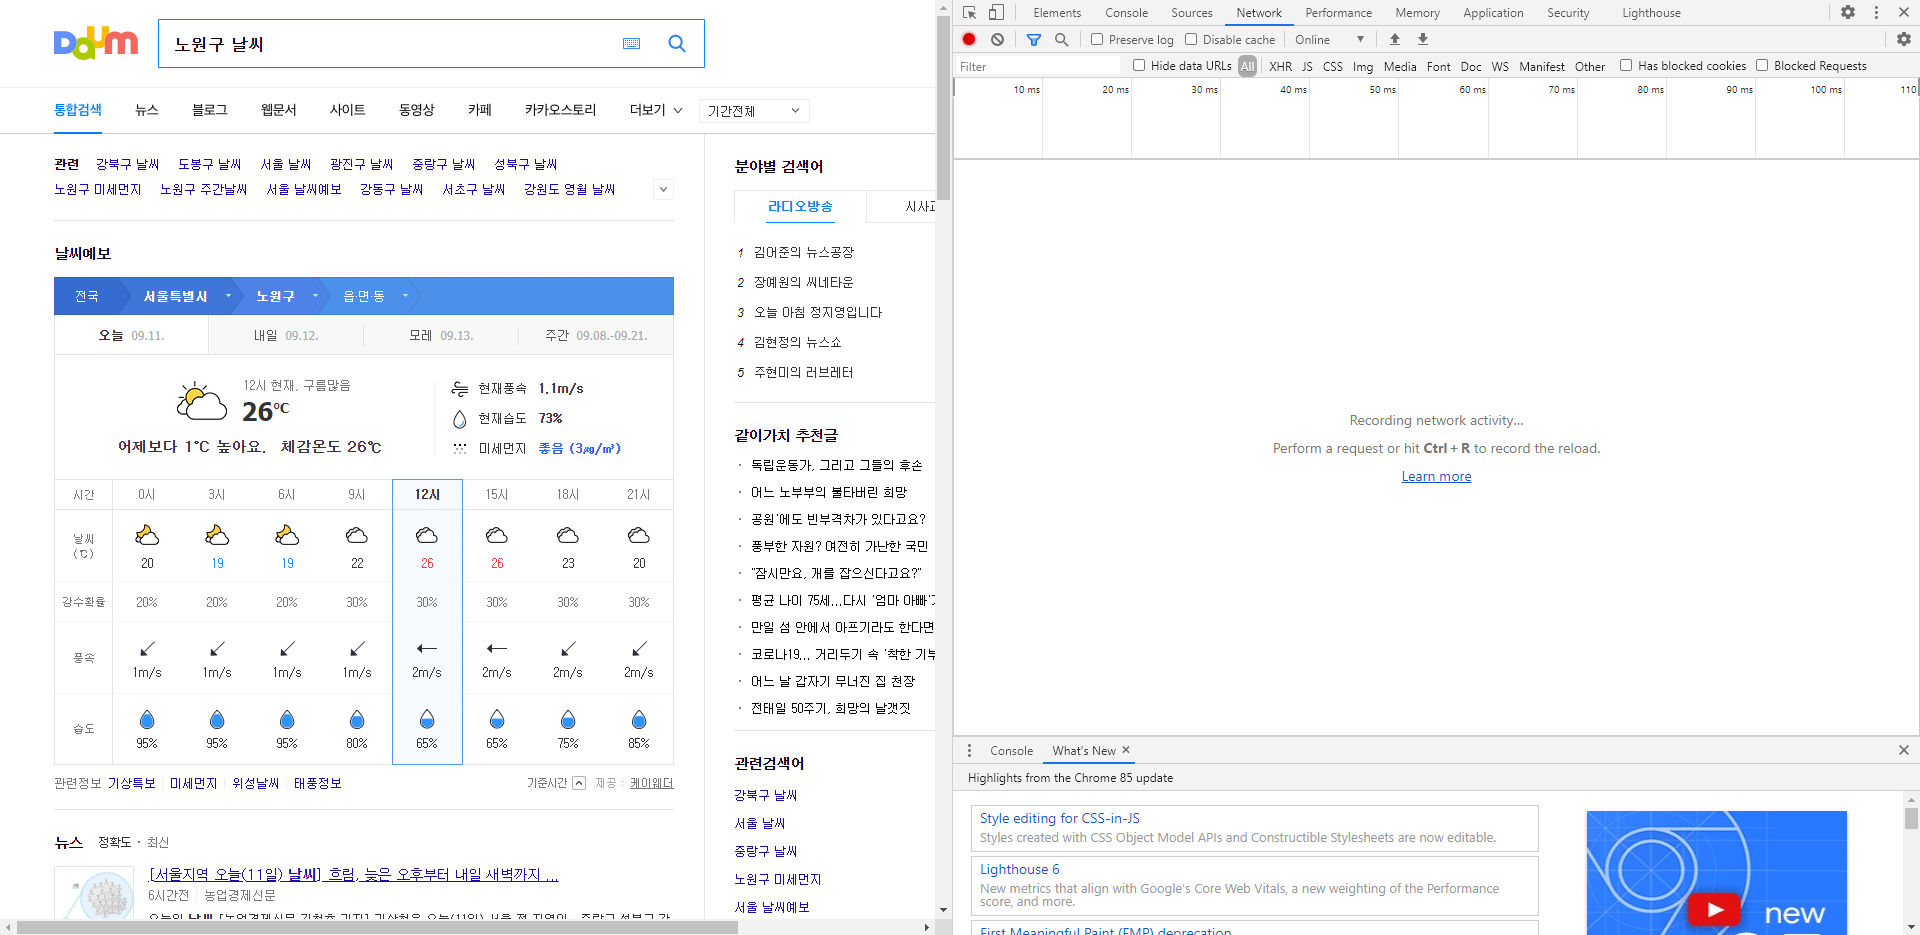

In [4]:
df = []
for table in soup.select('#weatherColl .wrap_tbl .tbl_weather'):
    columns = [th.text.strip() for th in table.select('thead tr th')]
    values = []
    for tr in table.select('tbody tr'):
        values.append([td.text.strip() for td in tr.select('td')])
    df.append(pd.DataFrame(values, columns=columns[1:]))

In [5]:
df[0] #오늘

,0시,3시,6시,9시,12시,15시,18시,21시
0,구름많음 20℃,구름많음 19℃,구름많음 19℃,흐림 22℃,흐림 26℃,흐림 26℃,흐림 23℃,흐림 20℃
1,20%,20%,20%,30%,30%,30%,30%,30%
2,북동풍1m/s,북동풍1m/s,북동풍1m/s,북동풍1m/s,동풍2m/s,동풍2m/s,북동풍2m/s,북동풍2m/s
3,95%,95%,95%,80%,65%,65%,75%,85%


In [6]:
df[1] #내일

,0시,3시,6시,9시,12시,15시,18시,21시
0,흐림 20℃,흐림 19℃,흐림 19℃,흐림 20℃,흐림 23℃,흐림 24℃,흐림 22℃,흐림 20℃
1,30%,30%,30%,30%,30%,30%,30%,30%
2,북동풍1m/s,북동풍1m/s,북동풍1m/s,북동풍1m/s,북동풍2m/s,북동풍2m/s,북동풍2m/s,북동풍2m/s
3,85%,90%,90%,90%,75%,70%,75%,80%


In [7]:
df[2] #모레

,0시,3시,6시,9시,12시,15시,18시,21시
0,흐림 18℃,구름많음 17℃,맑음 17℃,구름많음 20℃,구름많음 24℃,구름많음 24℃,구름많음 22℃,맑음 20℃
1,30%,20%,0%,20%,20%,20%,20%,0%
2,북동풍1m/s,북풍1m/s,북풍1m/s,북동풍1m/s,북동풍2m/s,북동풍2m/s,북동풍2m/s,북동풍1m/s
3,85%,90%,90%,75%,65%,65%,70%,85%
